*Excercise in Deep Learning*
*Regression*

This example goes through:

- Make a small set of linearly related data
- Use a neural network to fit a model
- Show how error of fit changes with training epochs
- Show that the trained coefficients are the slope and intercept

required python software packages (install with pip):
- numpy
- tensorflow
- matplotlib

*Conclusions*

One can do a least-squares fit with a neural net, however for small data sets it is less accurate
and slower than the conventional method.

The next step will show how to scale this up to millions of data points, which is not practical for
conventional methods.


In [1]:
""" some variables you can experiment with to see how they affect the results """

nrows = 1000      # number of rows for example, change this to see impact
                  # of data size
    
numEpochs = 500   # number of training steps.

slope = 3.0       # slope of line to be generated
intercept = 7.0   # intercept of line
                  # you can experiment with these

#
#   with these conditions the RMS error is 0.0032, slope is 3.0009,  intercept 6.9995
#   

In [2]:
import numpy as np
# numpy is an essential library of numeric methods for python. It is also optimized
# for high performance.
# https://numpy.org/


#
# create a data set for y = mx + b, linearly related variables
# returns a tuple (x,y) of 'nrows' of correlated data
#
def create_data():
    
    # use the numpy library to create a random list
    # of numbers beteen 0 and 1.  np.random.uniform supplies this.
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
    x = np.random.uniform(low=0, high=1, size=nrows)
    
    # numpy allows "overloading operators"  to allow a natural
    # syntax for multiplying and adding to a list
    y = slope*x + intercept
    
    # return x,y as a tuple
    return (x,y)


x,y = create_data()

# print first 10 values to see the results
# https://docs.python.org/3/tutorial/datastructures.html

print('x', x[:10])  # use python list syntax for first 10
print('y', y[:10])


x [0.98068156 0.06748614 0.20473789 0.89243181 0.12269473 0.47794011
 0.14174919 0.83921688 0.05514057 0.44515179]
y [9.94204468 7.20245841 7.61421366 9.67729542 7.36808419 8.43382032
 7.42524757 9.51765064 7.16542172 8.33545536]


In [3]:
"""
create the Neural Network model topology, which is one layer
"""
import tensorflow as tf
import tensorflow.keras as keras

def makeModel():

    # these two lines clear out the model so you can re-run 
    # the notebook with different conditions
    keras.backend.clear_session()
    tf.compat.v1.reset_default_graph()

    # https://keras.io/api/models/sequential/#sequential-class
    model = keras.Sequential()
    
    # https://keras.io/api/layers/core_layers/input/
    model.add(keras.Input(shape=(1,)))
    
    # define a single layer of neurons.  There are many options that 
    # could be used here but the default are used for this simple example
    
    # https://keras.io/api/layers/core_layers/dense/
    model.add(keras.layers.Dense(units=1, name='dense_layer'))
        
    # compile the network using default options.  The Adam optimizer
    # is good for general purpose, but would probably benefit from a custom
    # learning rate for this example
    #
    # the loss is function that will be minimized in the fitting process
    # https://keras.io/api/models/model_training_apis/#compile-method
    # https://keras.io/api/optimizers/adam/
    # https://keras.io/api/losses/regression_losses/#meansquarederror-class
    model.compile(optimizer='Adam', loss='mean_squared_error')
    
    #show the model structure and layer size
    # the model has 2 trainable variables - enough for a perfect fit.
    model.summary()
    
    return model


In [4]:
"""
Put the elements together to generate data, make the model, and perform the training
"""


# create the random data
x,y = create_data()

# create the neural network
model = makeModel()

# fit the model with 500 steps.  There is a way to stop on specified change
# in error but this is a simple example.
#
# https://keras.io/api/models/model_training_apis/#fit-method
history = model.fit(
    y=y,    # dependent variable
    x=x,    # independent variable
    epochs=numEpochs,  # try changing this to see how the error changes
    verbose=0,    # change this from 0-5 to get more info as the training proceeds
    )

# this method makes a prediction using the argument as input data

# the output of model.predict has to be reshaped, see the last 
# cell for more information
# https://www.tensorflow.org/api_docs/python/tf/reshape
predy = tf.reshape(model.predict(x), nrows)

# compute RMS error of prediction
# https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html
# https://numpy.org/doc/stable/reference/generated/numpy.average.html
rms_error = np.sqrt( np.average(((predy-y) ** 2)) )
print('\nrms error of prediction %6.5f' %(rms_error))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________

rms error of prediction 0.00021


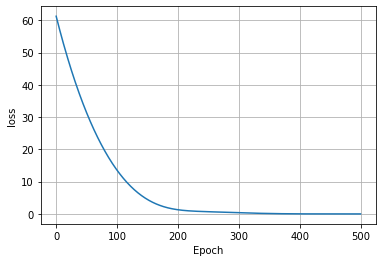

In [5]:
import matplotlib.pyplot as plt

# https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.html
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.grid(True)

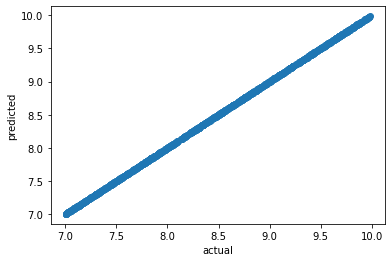

In [6]:
#
# plot predicted vs actual
# this should be a straight line with a
# slope of 1.0

plt.xlabel('actual')
plt.ylabel('predicted')
s = plt.scatter(y, predy)

model.predict shape tf.Tensor([1000    1], shape=(2,), dtype=int32)
shape is now tf.Tensor([1000], shape=(1,), dtype=int32)

computed slope/intercept:
slope 3.0007  intercept 6.9996


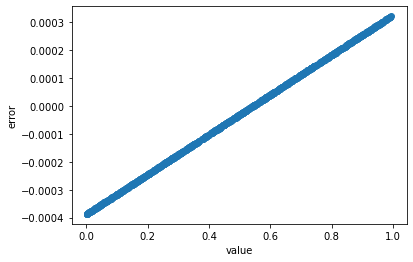

In [7]:
#
# plot error as a function of X
#

py = model.predict(x)
# the output of model.predict is this
print('model.predict shape', tf.shape(py))

# need to reshap to a normal list
py = tf.reshape(model.predict(x), nrows)
print('shape is now', tf.shape(py))

# now subtract predicted - actual y to look at errors
# https://numpy.org/doc/stable/reference/generated/numpy.subtract.html
error = np.subtract(py, y)

#
# plot the errors
# the errors are not randomly distributed
#
plt.scatter(x, error)
plt.xlabel('value')
s = plt.ylabel('error')


#
# one can get the coefficients of the neural net.  Normally they are not very interpretable
# but since in this model there are only two, they correspond to slope and intercept
#
# https://keras.io/api/models/model_saving_apis/#getweights-method
slope, intercept = model.get_weights()

print('\ncomputed slope/intercept:')
print('slope %5.4f  intercept %5.4f'  % (slope, intercept))